## Name - Amarah
### Dataset - Yeast



##  1. Download the dataset 2. Import the required libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
import pandas as pd

# specifying column names
column_names = ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc','target']

# reading in the dataset
df = pd.read_csv(r"C:\Users\Administrator\Downloads\yeast.data", header=None, delim_whitespace=True, names=column_names)


In [82]:
df.shape

(1484, 10)

### 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [83]:
df.head(2)

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,target
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


### 2. Comment on class imbalance with appropriate visualization method.

In [84]:
data=df.copy()

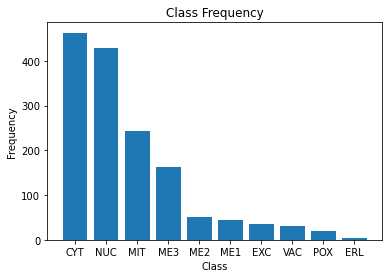

In [85]:

# Count number of samples in each class
class_count = data['target'].value_counts()

# Create bar plot
plt.bar(class_count.index, class_count.values)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 3. Provide appropriate visualizations to get an insight about the dataset.

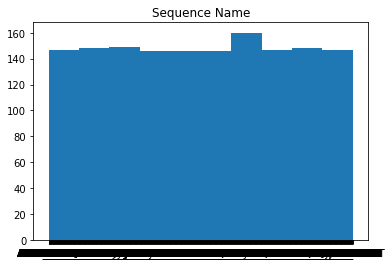

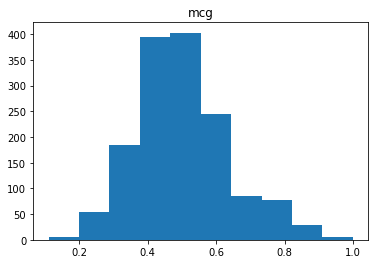

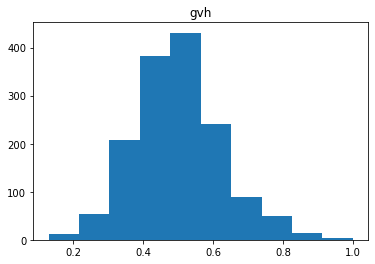

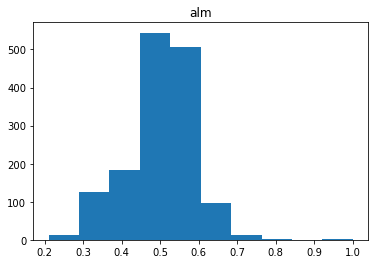

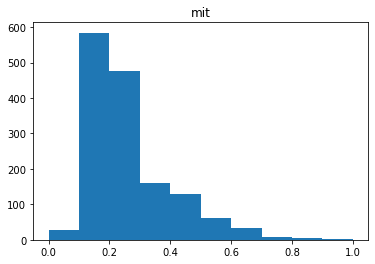

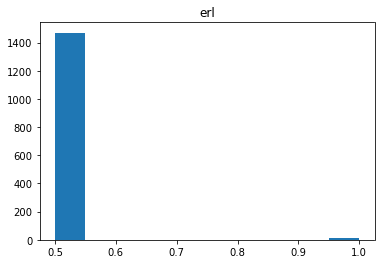

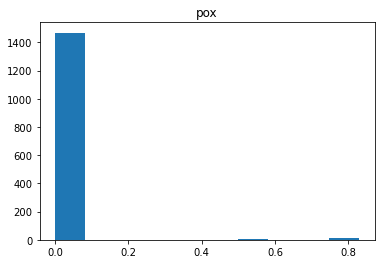

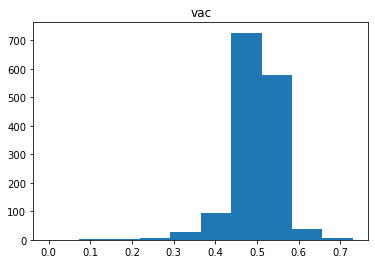

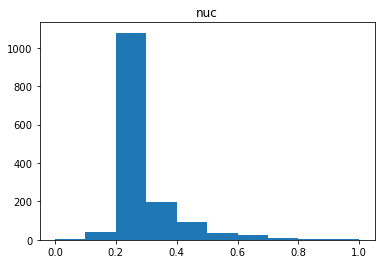

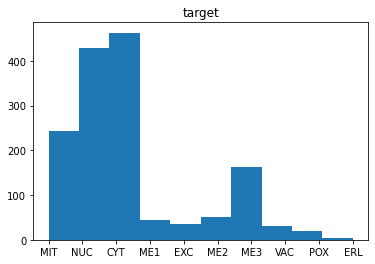

In [86]:
import matplotlib.pyplot as plt

# loop over each column and plot a histogram
for col in data.columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()


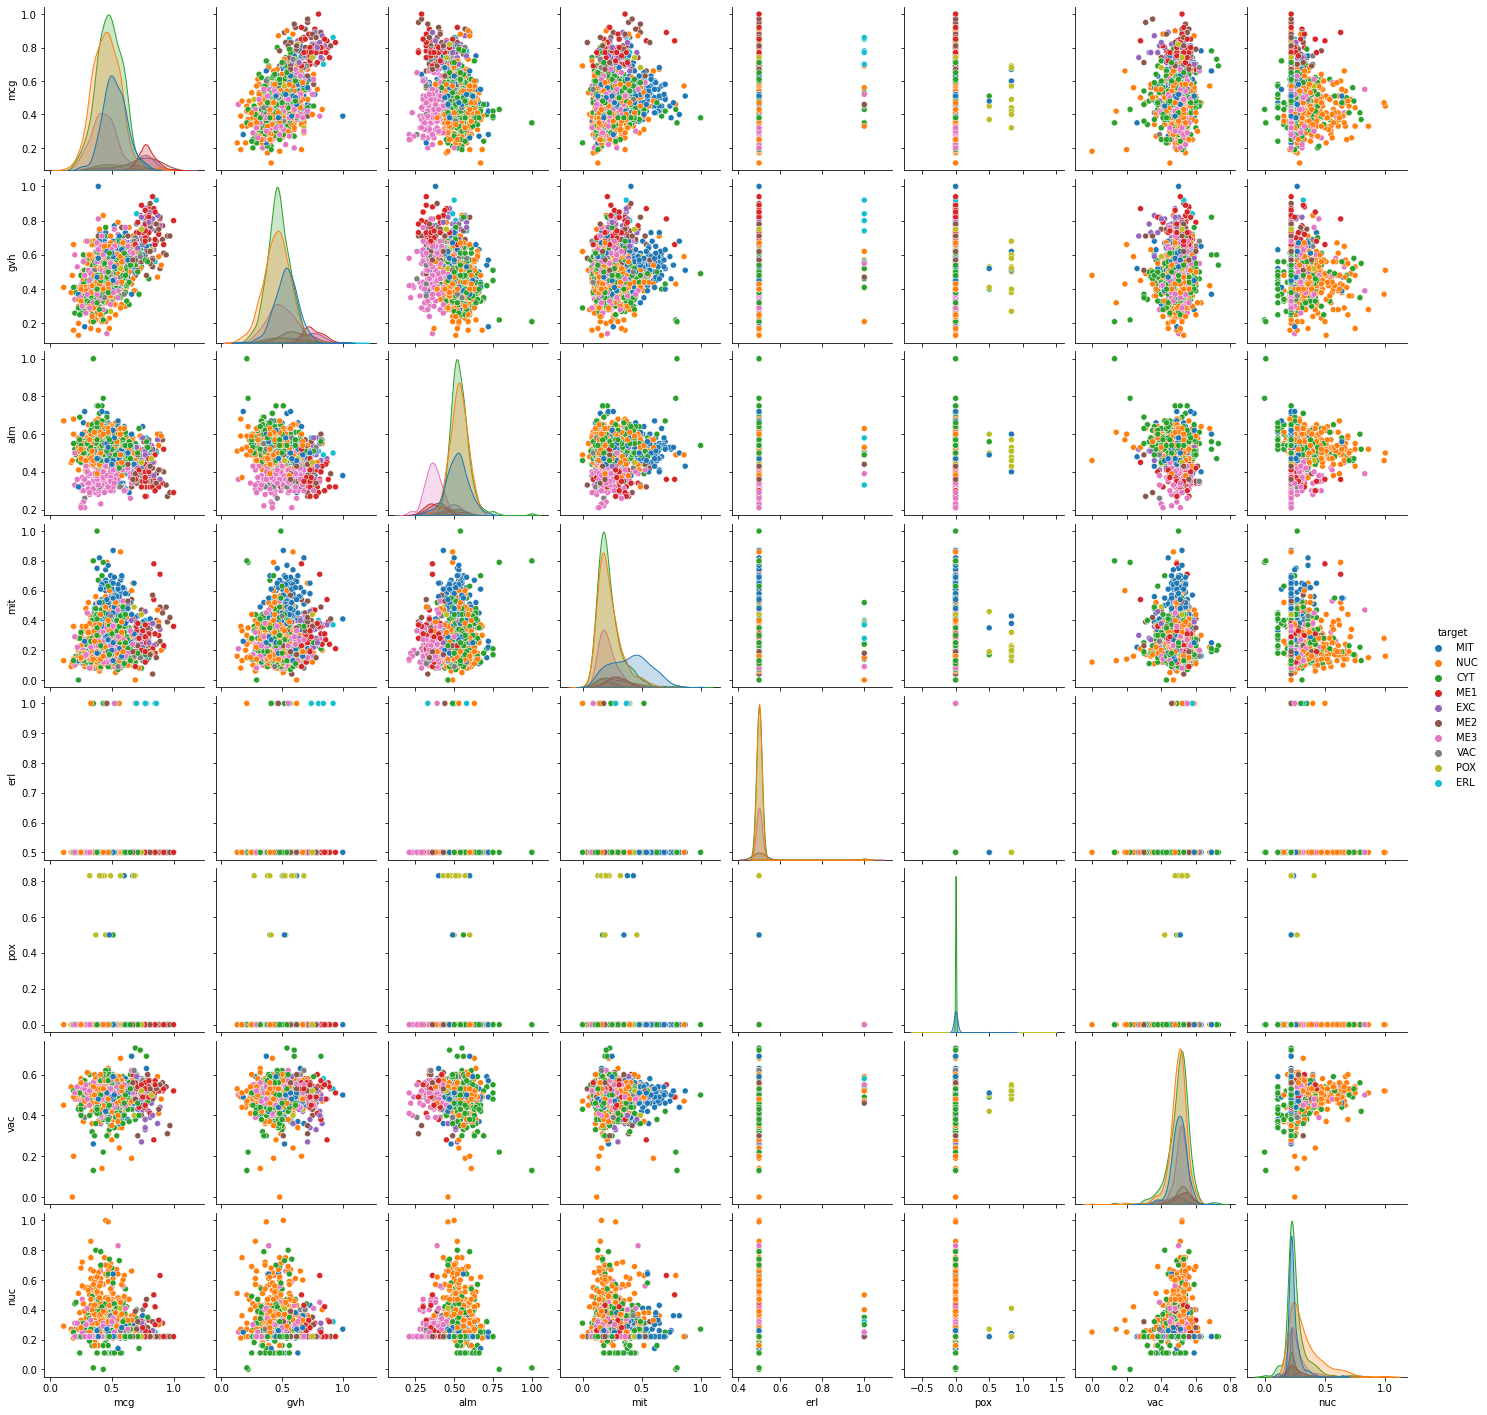

In [87]:
sns.pairplot(data,hue="target")

### 4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be considered. .

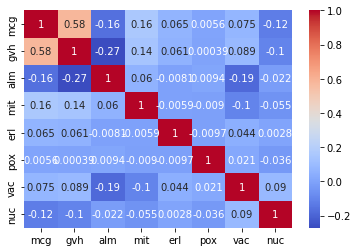

In [88]:
# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### 5. Any other visualisation specific to the problem statement.

<AxesSubplot:xlabel='target', ylabel='mcg'>

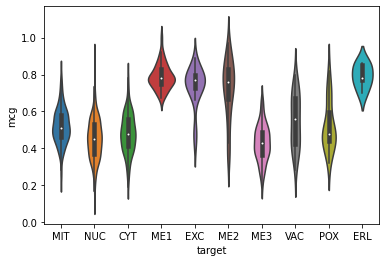

In [89]:
import seaborn as sns

sns.violinplot(x="target", y="mcg", data=data)


## 2. Data Pre-processing and cleaning

### 1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.

In [90]:
# Check for missing values
print(df.isnull().sum())

Sequence Name    0
mcg              0
gvh              0
alm              0
mit              0
erl              0
pox              0
vac              0
nuc              0
target           0
dtype: int64


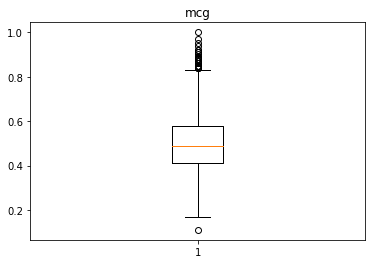

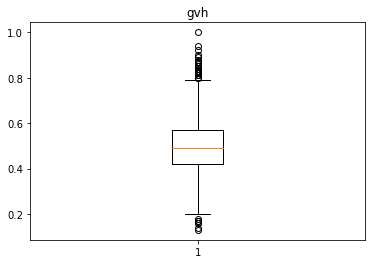

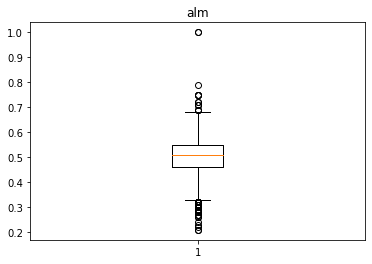

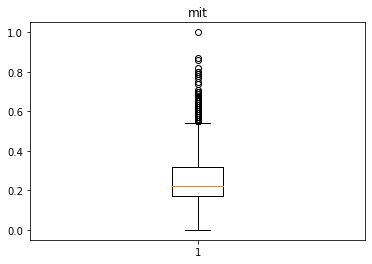

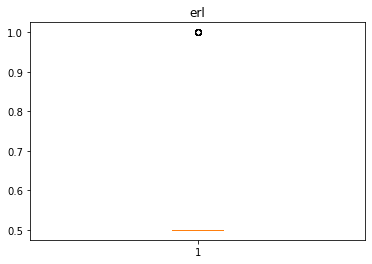

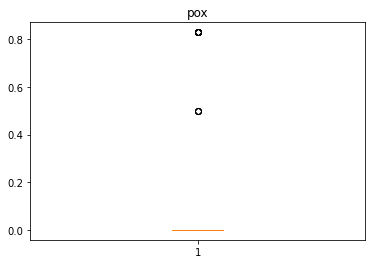

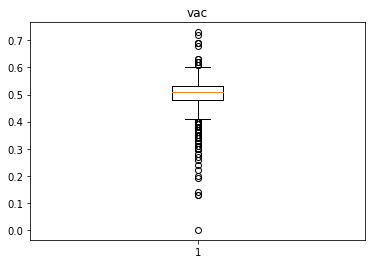

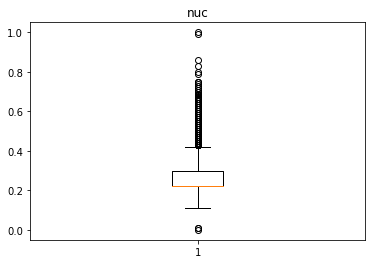

In [91]:
import matplotlib.pyplot as plt

# create boxplot for each numerical column
for column in data.select_dtypes(include=['float64']):
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()


In [93]:
#Comments - As we can see above, we do have outliers

In [94]:
#  handle outliers
# Get all float64 columns
float_cols = data.select_dtypes(include=['float64']).columns

# Remove outliers from each column
for col in float_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) |(data[col] > (Q3 + 1.5 * IQR)))]

# Reset index
data = data.reset_index(drop=True)



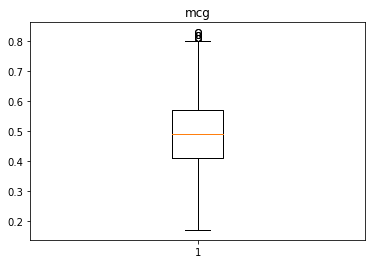

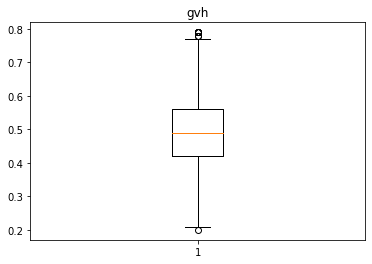

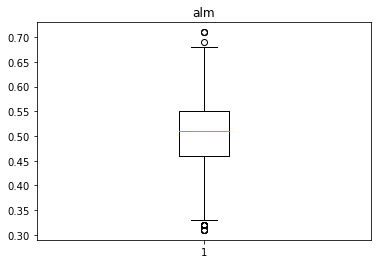

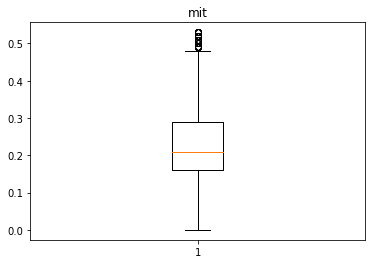

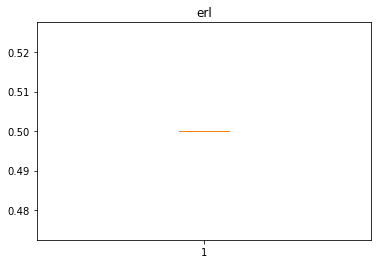

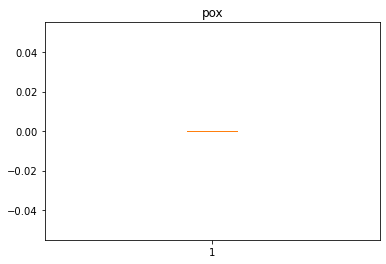

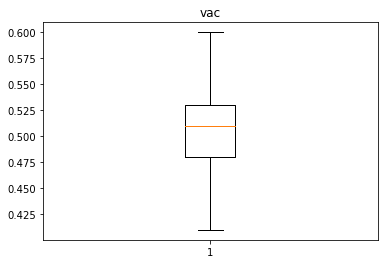

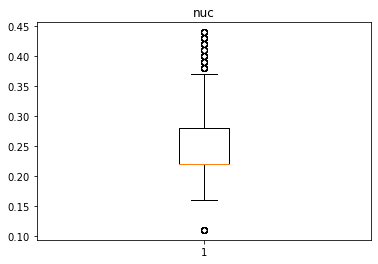

In [95]:
import matplotlib.pyplot as plt

# create boxplot for each numerical column
for column in data.select_dtypes(include=['float64']):
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()


In [96]:
# We have removed the outliers

### 2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. 

In [97]:
data.head()

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,target
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC


In [98]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns in the dataset
numerical_cols = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']

# Apply Min-Max normalization
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [99]:
data.head()

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,target
0,ADT1_YEAST,0.621212,0.694915,0.400,0.245283,0.0,0.0,0.368421,0.333333,MIT
1,ADT2_YEAST,0.393939,0.796610,0.425,0.509434,0.0,0.0,0.631579,0.333333,MIT
2,ADT3_YEAST,0.712121,0.711864,0.450,0.283019,0.0,0.0,0.631579,0.333333,MIT
3,AAR2_YEAST,0.621212,0.406780,0.650,0.245283,0.0,0.0,0.684211,0.333333,NUC
4,BAF1_YEAST,0.469697,0.423729,0.700,0.377358,0.0,0.0,0.894737,0.696970,NUC


### Model Building
1. Split the dataset into training and test sets. Answer without justification
will not be considered.

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ;

[ x_test1,y_test1] = 20% ;

Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ;

[ x_test2,y_test2] = 90%

In [100]:
# Case 1

In [101]:
from sklearn.model_selection import train_test_split

# Split data into X and y
X = data.drop('target', axis=1)
y = data['target']

# Split into training and test sets with 80% for training and 20% for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Case 2

In [103]:
from sklearn.model_selection import train_test_split

# Split data into X and y
X = data.drop('target', axis=1)
y = data['target']

# Split into training and test sets with 10% for training and 90% for testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)


### 2. Explore k-fold cross validation.

### 3. Build Model/s using 1) Logistic Regression 2) MLE 3) Any other appropriate model

In [104]:
data.head()

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,target
0,ADT1_YEAST,0.621212,0.694915,0.400,0.245283,0.0,0.0,0.368421,0.333333,MIT
1,ADT2_YEAST,0.393939,0.796610,0.425,0.509434,0.0,0.0,0.631579,0.333333,MIT
2,ADT3_YEAST,0.712121,0.711864,0.450,0.283019,0.0,0.0,0.631579,0.333333,MIT
3,AAR2_YEAST,0.621212,0.406780,0.650,0.245283,0.0,0.0,0.684211,0.333333,NUC
4,BAF1_YEAST,0.469697,0.423729,0.700,0.377358,0.0,0.0,0.894737,0.696970,NUC


In [105]:
# drop first column
data = data.drop("Sequence Name", axis=1) #not imp for model building

In [106]:
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,target
0,0.621212,0.694915,0.400,0.245283,0.0,0.0,0.368421,0.333333,MIT
1,0.393939,0.796610,0.425,0.509434,0.0,0.0,0.631579,0.333333,MIT
2,0.712121,0.711864,0.450,0.283019,0.0,0.0,0.631579,0.333333,MIT
3,0.621212,0.406780,0.650,0.245283,0.0,0.0,0.684211,0.333333,NUC
4,0.469697,0.423729,0.700,0.377358,0.0,0.0,0.894737,0.696970,NUC


In [110]:
from sklearn.preprocessing import LabelEncoder
name_encoder=LabelEncoder()
data["target"]=name_encoder.fit_transform(data["target"].values)

In [131]:
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,target
0,0.621212,0.694915,0.400,0.245283,0.0,0.0,0.368421,0.333333,5
1,0.393939,0.796610,0.425,0.509434,0.0,0.0,0.631579,0.333333,5
2,0.712121,0.711864,0.450,0.283019,0.0,0.0,0.631579,0.333333,5
3,0.621212,0.406780,0.650,0.245283,0.0,0.0,0.684211,0.333333,6
4,0.469697,0.423729,0.700,0.377358,0.0,0.0,0.894737,0.696970,6


In [132]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(max_iter=200)
log_classifier.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [135]:
print("Train Score:",log_classifier.score(x_train,y_train))
print("Test Score:",log_classifier.score(x_test,y_test))

Train Score: 0.5543113101903695
Test Score: 0.5357142857142857


In [118]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel="rbf",random_state=42)
svc_classifier.fit(x_train,y_train)

SVC(random_state=42)

In [119]:
print("Train Score:",svc_classifier.score(x_train,y_train))
print("Test Score:",svc_classifier.score(x_test,y_test))

Train Score: 0.6114221724524076
Test Score: 0.5669642857142857


### 4. Explore the need of regularization and incorporate few relevant techniques for the problem statement.

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Create a pipeline with Lasso logistic regression
pipe = make_pipeline(StandardScaler(),
                     SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear')),
                     LogisticRegression(penalty='l1', solver='liblinear'))

# Use grid search to find the best hyperparameters
param_grid = {'logisticregression__C': [0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the best model
lasso_model = grid.best_estimator_


In [124]:
lasso_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'))),
                ('logisticregression',
                 LogisticRegression(C=10, penalty='l1', solver='liblinear'))])

### 5. Compare models with and without regularization in a tabular format and justify the findings.

In [125]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split data into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with and without regularization
logreg = LogisticRegression(random_state=42)
logreg_l2 = LogisticRegression(penalty="l2", C=0.1, random_state=42)

# Train models
logreg.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)

# Evaluate models on test data
acc_logreg = accuracy_score(y_test, logreg.predict(X_test))
acc_logreg_l2 = accuracy_score(y_test, logreg_l2.predict(X_test))

# Create table comparing model performance
results = pd.DataFrame({
    "Model": ["Logistic Regression (No Regularization)", "Logistic Regression (L2 Regularization)"],
    "Accuracy": [acc_logreg, acc_logreg_l2],
})

print(results)


                                     Model  Accuracy
0  Logistic Regression (No Regularization)  0.523810
1  Logistic Regression (L2 Regularization)  0.434524


## 3. Performance Evaluation

### 1. Do the prediction for the test data and display the results for the inference.

In [126]:
# Assuming x_test is the test data
y_pred = log_classifier.predict(x_test)


In [127]:
y_pred

array([6, 0, 6, 0, 4, 0, 6, 6, 0, 0, 0, 5, 5, 5, 0, 5, 2, 0, 0, 6, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 4, 0, 6, 0, 5, 4, 0, 0, 0, 6, 0, 6, 5, 0, 0,
       0, 6, 6, 0, 0, 0, 4, 0, 6, 5, 6, 0, 5, 6, 6, 0, 3, 0, 4, 0, 0, 6,
       0, 0, 5, 0, 6, 6, 0, 0, 0, 0, 4, 6, 0, 5, 4, 0, 6, 0, 6, 6, 0, 6,
       0, 6, 0, 0, 0, 5, 5, 6, 0, 4, 0, 0, 0, 0, 5, 4, 6, 0, 5, 0, 4, 5,
       0, 0, 0, 6, 0, 0, 4, 6, 5, 0, 0, 0, 0, 0, 4, 3, 0, 4, 0, 0, 0, 0,
       0, 0, 4, 5, 6, 6, 5, 5, 5, 0, 5, 0, 0, 0, 4, 0, 1, 0, 0, 4, 0, 4,
       0, 0, 5, 0, 6, 4, 5, 5, 4, 0, 4, 6, 4, 0, 0, 0, 0, 6, 6, 0, 5, 4,
       0, 0, 6, 0, 0, 0, 0, 1, 0, 6, 6, 0, 0, 0, 4, 0, 5, 0, 0, 5, 6, 0,
       4, 4, 5, 0, 0, 0, 6, 6, 5, 0, 0, 4, 5, 5, 6, 4, 0, 6, 6, 0, 0, 0,
       4, 5, 6, 0])

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming log_classifier is the trained logistic regression model and x_test and y_test are the test data
y_pred = log_classifier.predict(x_test)

# Calculate the confusion matrix and print it
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification report and print it
class_report = classification_report(y_test, y_pred)
print(class_report)


[[57  0  0  0  0  6 16  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  2  1  2  0  1  0  0  0]
 [ 2  0  0  0  1  1  1  0  0]
 [ 4  0  0  0 22  0  0  0  0]
 [15  0  0  0  3 17  3  0  0]
 [34  0  0  0  1  6 23  0  0]
 [ 1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        79
           1       0.00      0.00      0.00         1
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         5
           4       0.79      0.85      0.81        26
           5       0.52      0.45      0.48        38
           6       0.53      0.36      0.43        64
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.54       224
   macro avg       0.37      0.28      0.29       224
weighted avg       0.53      0.54      0.51       224



### 2. Comment on under fitting/overfitting/just right model. Justify your comment.

In [137]:
print("Train Score:",log_classifier.score(x_train,y_train))
print("Test Score:",log_classifier.score(x_test,y_test))

Train Score: 0.5543113101903695
Test Score: 0.5357142857142857
